# **Question 1A:** Get to know the Data: WordCloud


---


In [1]:
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade pandas

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.5)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)


In [2]:
pip install matplotlib==3.1.3

Load all necessary libraries to read the data, create the wordClouds and display them

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

from string import digits
import re

#Read the data

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Read the train dataset which contains all the articles in each category

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df.head()

,Id,Title,Content,Label
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business


# **Text Data Cleaning**

>For the data cleaning process, we included the following:
* Remove all whitespaces and newlines 
* Remove all special characters and punctuation
* Replace contractions with full words (despite that they might be removed   later from the stopwords)
* Splitted attached words e.g.  “ForTheWin” =>  “For The Win”
* Lowered all capital letters  
>We tried removing the numbers from the text corpus and standarizing the sentences but it was proved to have no effect in our model's performance.

>As a rule, the Title of an article is a strong indicator of the content that follows. We need the Title to have high importance/weight in our data. Thus we concatenate the Title *three* times along with the Content, in a new dataframe column, named *Title Content*. This is the column we process and use to train our classifiers later.

>Both train and test data are preprocessed in the same exact way.

>(reference link: [python-efficient-text-data-cleaning](https://www.geeksforgeeks.org/python-efficient-text-data-cleaning/)







In [6]:
df['Title Content'] = pd.DataFrame(df['Title'] + ' ' + df['Title'] + ' ' + df['Title'] + ' ' + df['Content'])
df.head()

,Id,Title,Content,Label,Title Content
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment,"Netflix is coming to cable boxes, and Amazon i..."
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment,"Pharrell, Iranian President React to Tehran 'H..."
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology,Wildlife service seeks comments Wildlife servi...
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology,Facebook teams up with Storyful to launch 'FB ...
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business,Caesars plans US$880 mln New York casino Caesa...


In [7]:
def blank_space(x):
  return re.sub('[^A-Za-z0-9]+', ' ', x)

def numbers(x):
  return re.sub(r'[0-9]+', '', x)

def standarize_sentence(x):
  return ''.join(''.join(word)[:2] for word in x) 

def apostrophe_words(x):
  Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will", 
           "'d":" would","'ve":" have","'re":" are"} 
  for key,value in Apos_dict.items(): 
      if key in x: 
          return x.replace(key,value)
  return x

def split_words(x):
  return " ".join([word for word in re.split("([A-Z][a-z]+[^A-Z]*)",x) if word])

def shallow_cleaning(df):
  remove_digits = str.maketrans('', '', digits)
  df['Title Content'] = df['Title Content'].apply(lambda x: apostrophe_words(x))
  df['Title Content'] = df['Title Content'].apply(lambda x: blank_space(x))
  df['Title Content'] = df['Title Content'].apply(lambda x: numbers(x))
  df['Title Content'] = df['Title Content'].apply(lambda x: split_words(x))
  df['Title Content'] = df['Title Content'].apply(lambda x: standarize_sentence(x))
  df['Title Content'] = df['Title Content'].str.strip()
  df['Title Content'] = df['Title Content'].str.lower()
  return df

df = shallow_cleaning(df)
df['Title Content'].head()

0    netflix is coming to cable boxes and  amazon i...
1    pharrell  iranian  president  react to  tehran...
2    wildlife service seeks comments  wildlife serv...
3    facebook teams up with  storyful to launch  fb...
4    caesars plans  us  mln  new  york casino  caes...
Name: Title Content, dtype: object

Remove special characters from "Title Content" column since they do not contribute to the WordCloud generation

In [8]:
spec_chars = ["!", '"', "#", "%", "&", "'", "(", ")", "*", "+", ",", "-", ".", "/", ":", ";", "<",
              "=", ">", "?", "@", "[", "\\", "]", "^", "_", "`", "{", "|", "}", "~", "–"]

for char in spec_chars:
    df['Title Content'] = df['Title Content'].str.replace(char, '')

df['Title Content'].head()

0    netflix is coming to cable boxes and  amazon i...
1    pharrell  iranian  president  react to  tehran...
2    wildlife service seeks comments  wildlife serv...
3    facebook teams up with  storyful to launch  fb...
4    caesars plans  us  mln  new  york casino  caes...
Name: Title Content, dtype: object

Group the title and content of each label in a large text variable to prepare the data for WordCloud generation. Each text variable represents the title and content of each category after the pre-processing and cleaning that has already been performed up to this point.

In [9]:
entertainment_content = ""
technology_content = ""
business_content = ""
health_content = ""
for i in df.index: 
  if df['Label'][i] == "Entertainment":
    entertainment_content += df['Title Content'][i]
  if df['Label'][i] == "Technology":
    technology_content += df['Title Content'][i]
  if df['Label'][i] == "Business":
    business_content += df['Title Content'][i]
  if df['Label'][i] == "Health":
    health_content += df['Title Content'][i]

#Stop Words
Download English language stop words as they are defined in nltk library


In [10]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Append more words to the *stop_words* list in order to exclude them from the wordClouds since they appear a lot but they do not contribute to each category representation

In [11]:
stop_words.append("said")
stop_words.append("say")
stop_words.append("says")
stop_words.append("one")
stop_words.append("also")
stop_words.append("may")
stop_words.append("will")
stop_words.append("seem")
stop_words.append("many")
stop_words.append("much")
stop_words.append("think")
stop_words.append("like")
stop_words.append("would")
stop_words.append("even")
stop_words.append("well")
stop_words.append("time")
stop_words.append("look")
stop_words.append("get")
stop_words.append("still")
stop_words.append("could")
stop_words.append("however")

#WordClouds

Use the wordcloud library to generate the wordCloud of each category and the matplotlib library to display the result. The text used to generate the word clouds is the text variable of each category that contains the processed title and content words. We chose white background color to make the cloud easier to read. The argument interpolation="bilinear" in the plt.imshow() makes the displayed wordCloud appear more smoothly.


##WordCloud for "Entertainment" Category

It seems that the words "show", "year", "old", "film", "new york" and "character" are the most mentioned words in the articles of "Entertainment" category. This aligns with the fact that show, film and character are the most characteristics we use to talk about an "Entertainment" incident. New York is a city where a lot of cultural events and film festivals take place, so it makes sense to be used a lot in entertainment articles.

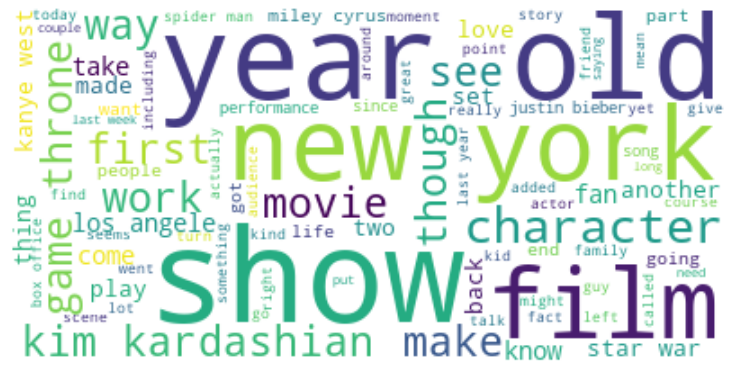

In [12]:
entertainment_wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, min_font_size = 6).generate(entertainment_content)

plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(entertainment_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##WordCloud for "Technology" Category

It seems that the words "device", "company" and "samsung galaxy" are the most mentioned words in the articles of "Technology" category. This is expected because when we talk about a technology feature or product, we usually refer to the company that produces it. And also most technology products can be referred to as "devices". One of the most commonly used devices is the smartphone Samsung Galaxy, as WordCloud indicates. The words "microsoft", "apple", and "google" are the next most common ones and seem to be equally used. This aligns with the fact that those are among the biggest technology companies at the time.

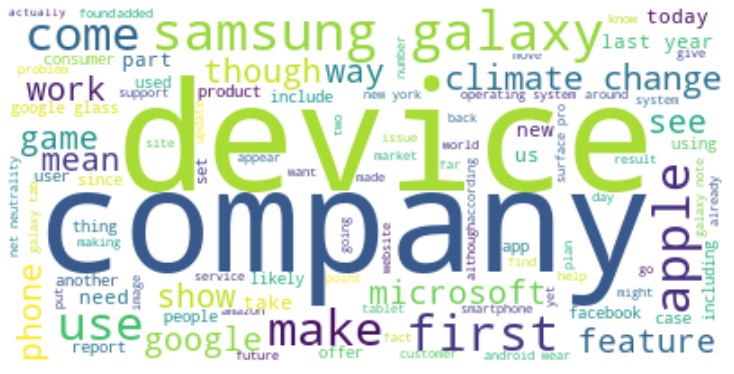

In [13]:
technology_wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, min_font_size = 6).generate(technology_content)

plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(technology_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##Word Cloud for "Business" Category

The results for the Business category are expected since phrases such as "company", "interest rate", "first quarter" and "market" are widely used to describe business cases. "new york" is the second most commonly used characteristic because of Wall Street in the Financial District of Lower Manhattan.

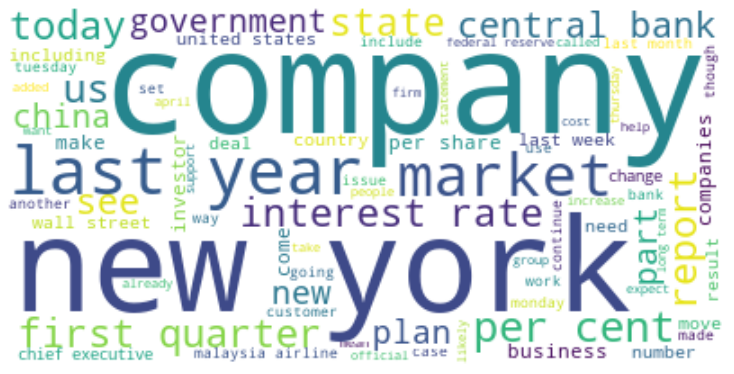

In [14]:
business_wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, min_font_size = 6).generate(business_content)

plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(business_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

##Word Cloud for "Health" Category

It seems that "patient", "report", "doctor" and "public health" are the most characteristics in the articles about Health. This is an expected outcome, since those phrases are widely used when it comes to a medical incident 

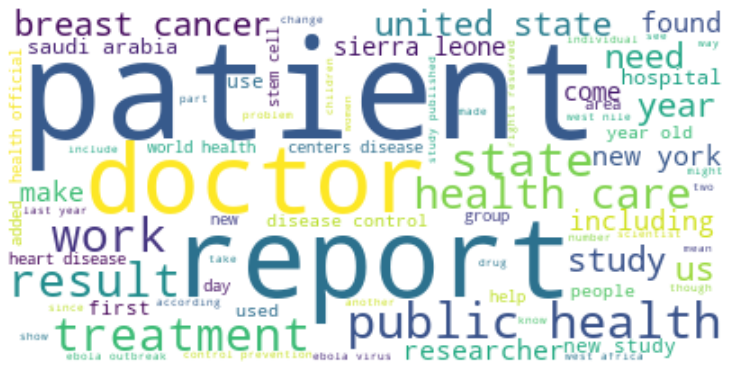

In [15]:
health_wordcloud = WordCloud(background_color = 'white', stopwords = stop_words, min_font_size = 6).generate(health_content)

plt.figure(figsize=(10,8),facecolor = None)
plt.imshow(health_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=10000, stop_words= stop_words, ngram_range=(1, 2))

temp = df['Content']

train_vector = vectorizer.fit_transform(temp)

In [ ]:
print(train_vector.shape[0])

111795


In [ ]:
!pip install --upgrade lshashpy3

Requirement already up-to-date: lshashpy3 in /usr/local/lib/python3.6/dist-packages (0.0.8)


In [ ]:
from lshashpy3 import LSHash

In [ ]:
#def create_lsh_index(k):
d = 10000 # Dimension of Feature vector
lsh = LSHash(hash_size=10, input_dim=d)
for i in range(train_vector.shape[0]):
  t = train_vector[i].todense()
  a = t.getA()
  lsh.index(a[0], extra_data=str(i))
  #return lsh